# What is Machine Learning
Area of computer science aim at getting a program to learn from data without explicitly being programmed. Evolved from pattern recognition and computational learning theory. The idea is that a model or agent is trained by looking at data and eventially should be ago to generalize what it has learned to new examples. Strategies: regression, clustering, neural networks, support vector machines. Examples: deep blue, go zero, license plate detectors, spam classification, trading algorithms.

# Important Preface
* Training and testing
* Structured versus unstructured data
* 

# Types of Machine Learning
1. Supervised
2. Unsupervised (semi-supervised)
3. Reinforcement

# Machine Learning Concepts
1. Regression Algorithms
2. Logistic Regression
3. K nearest neighbors
4. Support Vector Machines
5. Decision Trees
6. Random Forest / Ada Boost
7. Naive Bayes

# Neural Networks
1. Perceptron and Activation
2. Cost Function
3. Gradient Descent
4. X to X
4. Feedforward / Multi Layer Perceptron
5. Convolutional Neural Networks
6. Recurrent Neural Networks
7. Generative Adversarial Neural Networks
8. Deep Reinforcement Learning
9. Auto-Encoers

# Applications
* Image Tagging
* Semantic Segmentation
* Counting
* Video Understanding
* Text Summarization
* Consistency Detection in Text
* Generating Images
* Profiling and Recommender Systems
* Stylization
* Libratus
* Deep Blue to Go Zero
* Document Information Extraction
* Domain Adaptation

# Subjects to Cover
1. Tsne
2. N-grams
3. Bag of Words
4. Structured versus Unstructured Data
5. Finetuning
6. Transfer Learning

# Advanced Topics
1. One/Few shot learning - Transfer Learning
2. Ensemble Learning
3. Neural Turing Machine
4. Capsule Networks
5. Regularization, Normalization and Dropout
6. Deep Q learning
7. Meta Learning
8. Wide and Deep Learning
9. ResNet

#What is Machine Learning
### Supervised Learning
Data can be split into training and test data, where the training data is labelled and the algorithms learns a mapping between the training set and its associated labels. Spam/Ham or stock market predictions are supervised problems.

![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2013/11/Supervised-Learning-Algorithms.png)

### Unsupervised Learning
Data is not labelled and does not have known results. A model is tasked with extracting rules and to organize data by similarity. Strategies include clustering, dimensionality reduction, association rule learning. Behavior based detection, anomaly detection.

![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2013/11/Unsupervised-Learning-Algorithms.png)

### Semi supervised learning
Mixture of labelled and unlabelled data, the model must learn the strutures to organize the data. Kind of like supervised learning, but with a huge test set compare to training set

![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2013/11/Semi-supervised-Learning-Algorithms.png)

### Reinforement Learning
Software agent interacts with its environemnt. With goal of maximizing a reward. Examples are game theory, control theory, operations research. Chess, mario kart, go.

![alt text](https://upload.wikimedia.org/wikipedia/commons/1/1b/Reinforcement_learning_diagram.svg)

# Machine Learning Concepts

## 1. Regression
Modeling a linear relationship between variables iteratively while reducing some measure of error. Regression is a class of problem as well as an algorithm (this can be confusing). Really regression serves to fit a function to the data points that are labelled

<function matplotlib.pyplot.show>

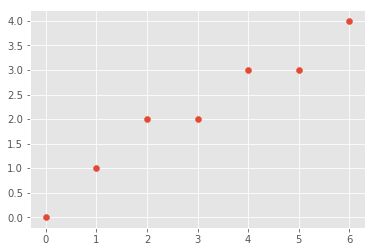

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

x = np.array([0.0,1.,2.,3.,4.,5.,6.])
y = np.array([0.0,1.,2.,2.,3.,3.,4.])
plt.scatter(x,y)
plt.show

In [ ]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

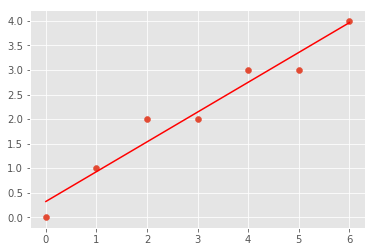

In [2]:
model = linear_model.LinearRegression()
model.fit(x.reshape(len(x),1),y.reshape(len(x),1))
preds = model.predict(x.reshape(len(x),1))
plt.scatter(x,y)
plt.plot(x, preds, color='r')
plt.show()

## 2. K Nearest Neighbors
Clustering strategy finds closest labeled datapoints, and choose class based on majority. Distance metric can be euclidean, hamming, cosine. Similar to K means clustering

Introduce iris data set:
https://en.wikipedia.org/wiki/Iris_flower_data_set

In [15]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [16]:
df = sns.load_dataset("iris")
df = df.drop('sepal_width', 1)
df = df.drop('sepal_length', 1)

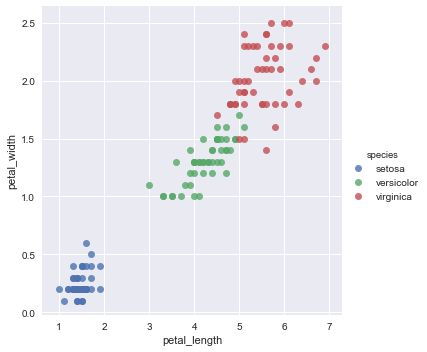

In [17]:
sns.lmplot("petal_length", "petal_width", data=df, hue='species', fit_reg=False)

In [14]:
X = df[['petal_length', 'petal_width']].values
y = df['species'].values
model = KNeighborsClassifier()
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
new_point = np.array([[6,2]])
model.predict(new_point)

array(['virginica'], dtype=object)

## 3. Support Vector Machine
Linear classification strategy, maximum margin classification algorithm. Fit the best hyperplane to separate the data classes, classification, regression, outlier, time series.

Define a hyperplane (n-1 dimensions) that separates the data most accurately.

Interesting things about SVM
* Hinge Loss
* Kernel Trick, compares a measure of similarity, that can be defined in any way
* Mercer condition, acts like a similarily, well behaved function

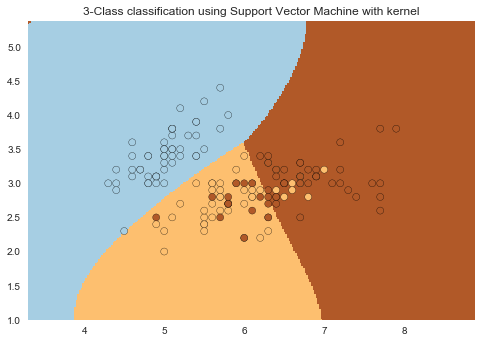

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target

h = .02

clf = svm.SVC(kernel='rbf')
clf.fit(X, Y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with kernel')
plt.axis('tight')
plt.show()

## Decision Trees
One of the most used methods of machine learning, it also has the advantage of being interpretable, you can understand exactly why it is making the decsions it makes.



In [1]:
from sklearn.datasets import load_iris
from sklearn import tree

df = load_iris()
data = df.data
labels = df.target
clf = tree.DecisionTreeClassifier()
clf.fit(data, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

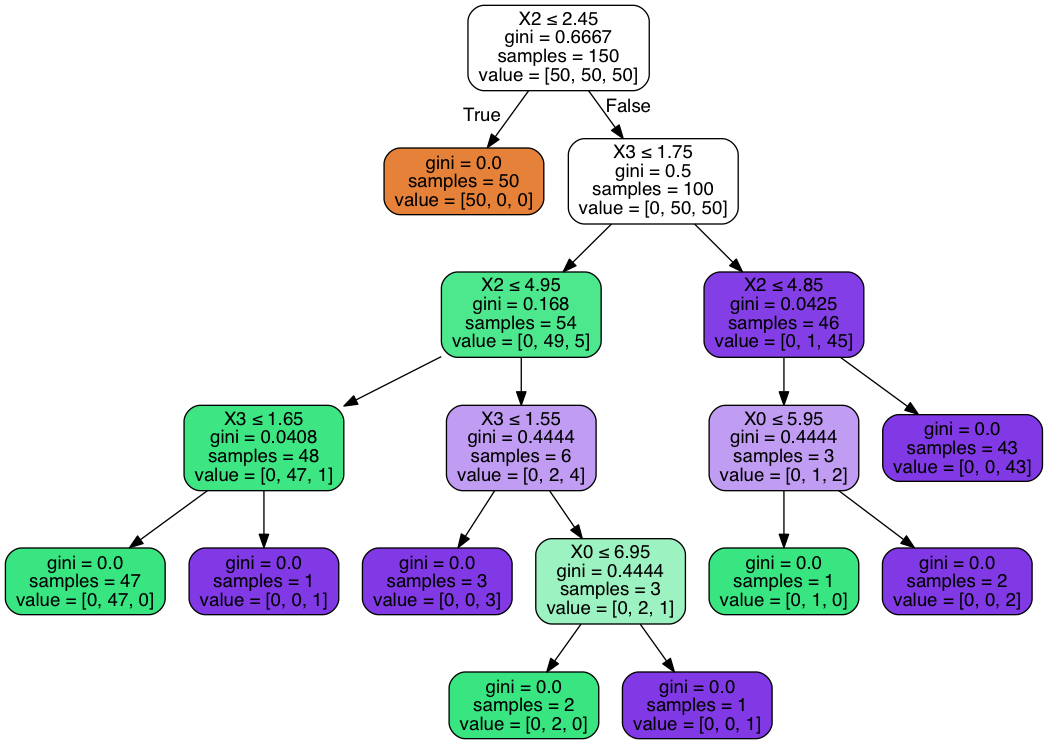

In [3]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forest
Bootstrap aggregatting, or bagging

Large collection of decorrelated decision trees. Extremely simple technique, but typically has state of the art performance. Essentially beating a random forest is a sign that you are on to something serious.

Trees have very high variance and using an ensemble* of trees, it allows us to generalize better. Essentially machine learning by commitee

Methodology
1. Split data into 'b' bags with replacement
2. Build decision trees for each of the training sets, build forest
3. Input new data in to all the trees in the forest
4. Calculate the votes, mode is predicted class

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                        random_state=0, shuffle=False)
clf = RandomForestRegressor(max_depth=2, random_state=0)
clf.fit(data, labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

## Ada Boost
Creation of many models

Methodology:
1. Choose subset of training data randomly
2. Train a model
3. Find wrongly classified data with entire training data
4. Train a new model with weighted help from wrongly classified data
5. ...
6. Predict with all models ensemble